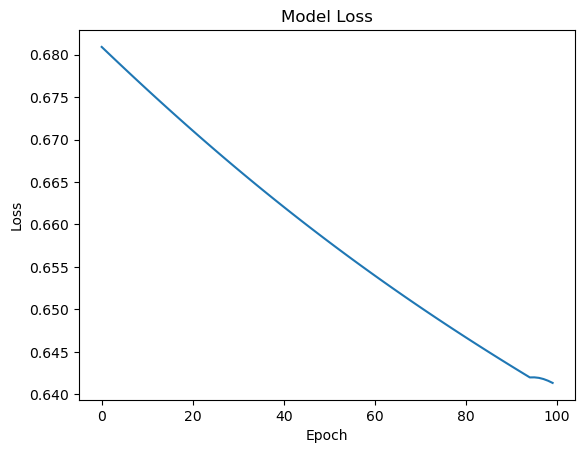

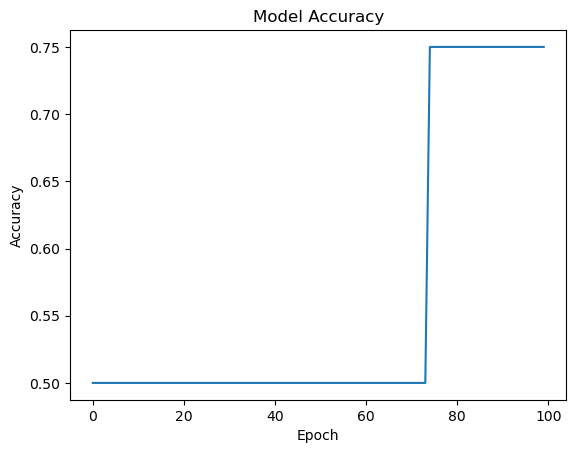

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simple dataset with two features and two classes
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 0])  # Target labels

# Define the model architecture
model = Sequential([
    Dense(2, input_shape=(2,), activation='relu'),  # Input layer with 2 neurons
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X, y, epochs=100, verbose=0)

# Plot training history (loss)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot training history (accuracy)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [2]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        # Forward pass through the network
        
        # Input layer to hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        
        # Hidden layer to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.sigmoid(self.output_input)
        
        return self.output

# Simple dataset with two features and two classes
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])  # Target labels

# Initialize the neural network
input_size = 2
hidden_size = 3
output_size = 1
model = NeuralNetwork(input_size, hidden_size, output_size)

# Perform forward pass
output = model.forward(X)

print("Predictions:")
print(output)


Predictions:
[[0.34048164]
 [0.44914157]
 [0.38000003]
 [0.46321374]]


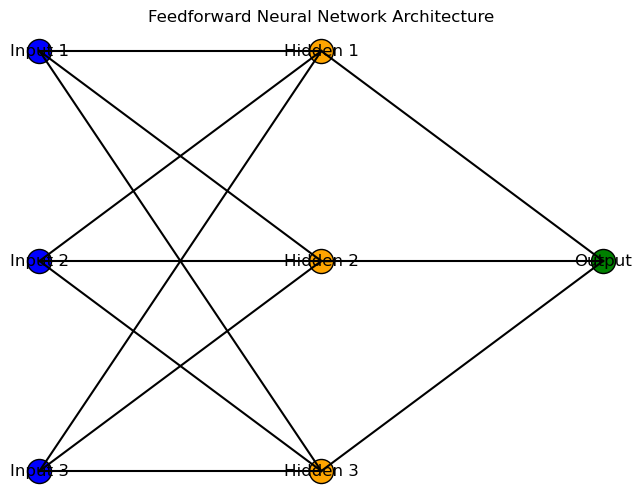

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the architecture of the neural network
input_size = 2
hidden_size = 3
output_size = 1

# Define the coordinates for nodes in each layer
input_layer_nodes = np.array([[0.1, 0.8], [0.1, 0.6], [0.1, 0.4]])  # Coordinates for input layer nodes
hidden_layer_nodes = np.array([[0.4, 0.8], [0.4, 0.6], [0.4, 0.4]])  # Coordinates for hidden layer nodes
output_layer_nodes = np.array([[0.7, 0.6]])  # Coordinates for output layer nodes

# Plot the neural network architecture
plt.figure(figsize=(8, 6))

# Plot input layer nodes
for i, node in enumerate(input_layer_nodes):
    plt.scatter(node[0], node[1], color='blue', s=300, edgecolors='black')
    plt.text(node[0], node[1], f'Input {i+1}', ha='center', va='center', fontsize=12)

# Plot hidden layer nodes
for i, node in enumerate(hidden_layer_nodes):
    plt.scatter(node[0], node[1], color='orange', s=300, edgecolors='black')
    plt.text(node[0], node[1], f'Hidden {i+1}', ha='center', va='center', fontsize=12)

# Plot output layer nodes
for i, node in enumerate(output_layer_nodes):
    plt.scatter(node[0], node[1], color='green', s=300, edgecolors='black')
    plt.text(node[0], node[1], f'Output', ha='center', va='center', fontsize=12)

# Connect nodes between layers
for input_node in input_layer_nodes:
    for hidden_node in hidden_layer_nodes:
        plt.plot([input_node[0], hidden_node[0]], [input_node[1], hidden_node[1]], color='black')

for hidden_node in hidden_layer_nodes:
    for output_node in output_layer_nodes:
        plt.plot([hidden_node[0], output_node[0]], [hidden_node[1], output_node[1]], color='black')

# Hide axis and show the plot
plt.axis('off')
plt.title('Feedforward Neural Network Architecture')
plt.show()


Predictions:
[[0.35489909]
 [0.45716054]
 [0.63513617]
 [0.51883551]]


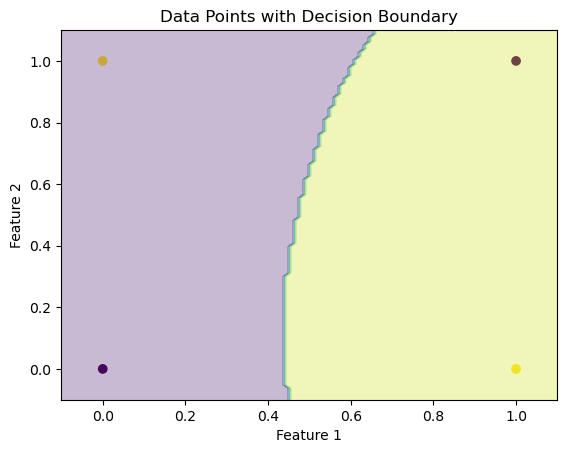

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the architecture of the neural network
input_size = 2
hidden_size = 3
output_size = 1

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        # Forward pass through the network
        
        # Input layer to hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        
        # Hidden layer to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.sigmoid(self.output_input)
        
        return self.output

    def train(self, X, y, epochs=100, learning_rate=0.1):
        # Train the neural network using gradient descent
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backpropagation
            
            # Calculate the error
            error = y - output
            
            # Compute gradients for output layer
            output_delta = error * (output * (1 - output))
            
            # Update output layer weights and bias
            self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
            self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
            
            # Compute gradients for hidden layer
            hidden_delta = np.dot(output_delta, self.weights_hidden_output.T) * (self.hidden_output * (1 - self.hidden_output))
            
            # Update hidden layer weights and bias
            self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
            self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

# Create a simple dataset for binary classification
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])  # Target labels

# Initialize the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
model.train(X, y, epochs=1000, learning_rate=0.1)

# Make predictions
predictions = model.forward(X)

# Print predictions
print("Predictions:")
print(predictions)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=np.squeeze(y), cmap='viridis')
plt.title('Data Points with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
Z = np.round(Z).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.show()


Predictions:
[[0.47448582]
 [0.53579622]
 [0.46992905]
 [0.50321424]]


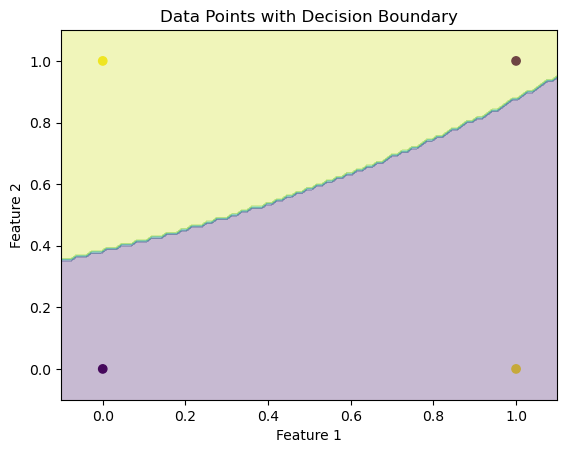

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the architecture of the neural network
input_size = 2
hidden_size = 3
output_size = 1

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        # Forward pass through the network
        
        # Input layer to hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        
        # Hidden layer to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.sigmoid(self.output_input)
        
        return self.output

    def train(self, X, y, epochs=100, learning_rate=0.1):
        # Train the neural network using gradient descent
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backpropagation
            
            # Calculate the error
            error = y - output
            
            # Compute gradients for output layer
            output_delta = error * (output * (1 - output))
            
            # Update output layer weights and bias
            self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
            self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
            
            # Compute gradients for hidden layer
            hidden_delta = np.dot(output_delta, self.weights_hidden_output.T) * (self.hidden_output * (1 - self.hidden_output))
            
            # Update hidden layer weights and bias
            self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
            self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

# Create a simple dataset for binary classification
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])  # Target labels

# Initialize the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
model.train(X, y, epochs=1000, learning_rate=0.1)

# Make predictions
predictions = model.forward(X)

# Print predictions
print("Predictions:")
print(predictions)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=np.squeeze(y), cmap='viridis')
plt.title('Data Points with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
Z = np.round(Z).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.show()


In [6]:
import numpy as np

# Generate a simple dataset with two features and two classes
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Define corresponding labels
y = np.array([0, 1, 1, 0])  # Target labels (0 or 1)


In [7]:
class FeedforwardNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        # Forward pass through the network
        
        # Input layer to hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        
        # Hidden layer to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.sigmoid(self.output_input)
        
        return self.output

    def train(self, X, y, epochs=100, learning_rate=0.1):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backpropagation
            error = y - output
            output_delta = error * (output * (1 - output))  # Derivative of the sigmoid function
            error_hidden = np.dot(output_delta, self.weights_hidden_output.T)
            hidden_delta = error_hidden * (self.hidden_output * (1 - self.hidden_output))  # Derivative of the sigmoid function
            
            # Update weights and biases
            self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
            self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
            self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
            self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

# Define the architecture of the neural network
input_size = 2
hidden_size = 3
output_size = 1

# Initialize the neural network
model = FeedforwardNN(input_size, hidden_size, output_size)

# Train the neural network
model.train(X, y[:, np.newaxis], epochs=1000, learning_rate=0.1)

# Perform predictions
predictions = model.forward(X)
print("Predictions:\n", predictions)


Predictions:
 [[0.49872406]
 [0.50553997]
 [0.49686863]
 [0.50261161]]
